<a href="https://colab.research.google.com/github/swalehaparvin/ML_for_CyberSecurity/blob/main/SMS_Spam_Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [29]:
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollectionDataSet.zip to SMSSpamCollectionDataSet.zip


In [33]:
import zipfile
with zipfile.ZipFile('SMSSpamCollectionDataSet.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [35]:
import os
print("Dataset contents:", os.listdir('dataset'))

Dataset contents: ['spam.csv']


In [37]:
import pandas as pd
labels = pd.read_csv('dataset/spam.csv', encoding='latin-1')
print(labels.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [41]:
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = train_test_split(labels['v2'], labels['v1'], test_size=0.25, random_state=42)

vectorizer = TfidfVectorizer()
X_train_dataset = vectorizer.fit_transform(X_train_dataset)

In [42]:
classifier_log = LogisticRegression()
classifier_log.fit(X_train_dataset, y_train_dataset)

LogisticRegression()

In [47]:
X_test_example_transformed = vectorizer.transform(['URGENT! Your Mobile No 1234 was awarded a Prize', 'Hey honey, whats up?'])
predictions_logistic = classifier_log.predict(X_test_example_transformed)
print(predictions_logistic)

['spam' 'ham']


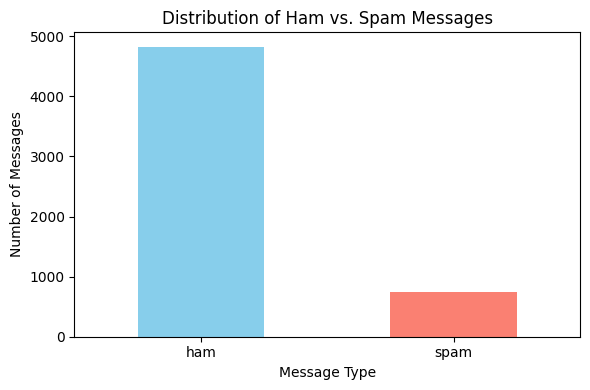

In [51]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (ham and spam)
label_counts = labels['v1'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Ham vs. Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()